# **Imports**

In [1]:
import torch
import numpy as np
# import matplotlib.pyplot as plt

### **Load test data** 

Import functions to process loaded data into a format that will fit the network

In [2]:
import sys
sys.path.insert(0, '../liset_tk/')
from signal_aid import *

In [14]:
data = np.load('../../compressed_spikes_validation.npy')
data = discretize_compressed(data, 50)
ripples = np.load('../data/validation_ripples.npy')

print('Loaded data:', data.shape)
print('Ripples:', ripples.shape)

Loaded data: (50, 9595426)
Ripples: (1309, 2)


### **Load Pytorch trained model**

In [4]:
from models import torchSNN
sys.path.insert(0, '../trainSNN/')

model_path = '../trainSNN/optimized_model/pytorchNetwork/256_128/E50_Y50/network.pt'
net = torchSNN(model_path)

No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.5'


### **Inference with it**

In [5]:
start, stop = 0, 9595426

In [6]:
# input = data[:, start:stop]
# output = net(input)

Fine tune the parameters for optimal rate detection method

In [15]:
output = np.load('../../output.npy')

window_size = 130
threshold = 25

predictions = detect_rate_increase(output, window_size, threshold)

### **Validation Process**

Take the ground truth ripples from the inference batch

In [9]:
mask = (ripples[:, 1] >= start) & (ripples[:, 0] <= stop)
window_ripples = ripples[mask]

In [11]:
sys.path.insert(0, '../utils/')
from eval import modelEval

validate = modelEval(window_ripples, model_type='SNN')

In [12]:
validate(predictions)

{'correct_predictions': '1247.00',
 'total_predictions': '4633.00',
 'total_gt': '1309.00',
 'precision': '0.27',
 'recall': '0.95'}

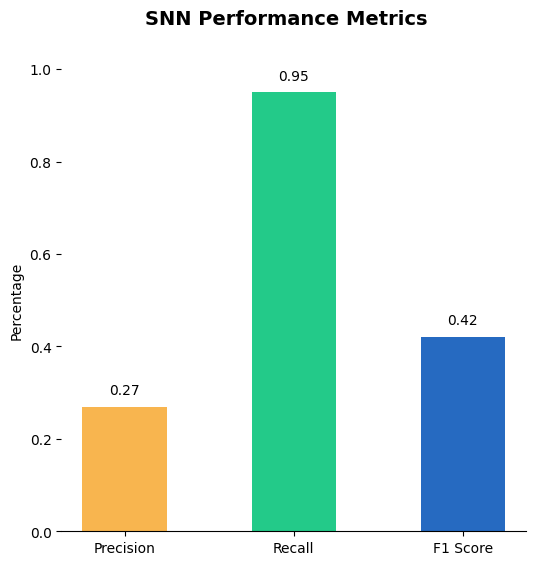

In [13]:
validate(predictions, chart=True)